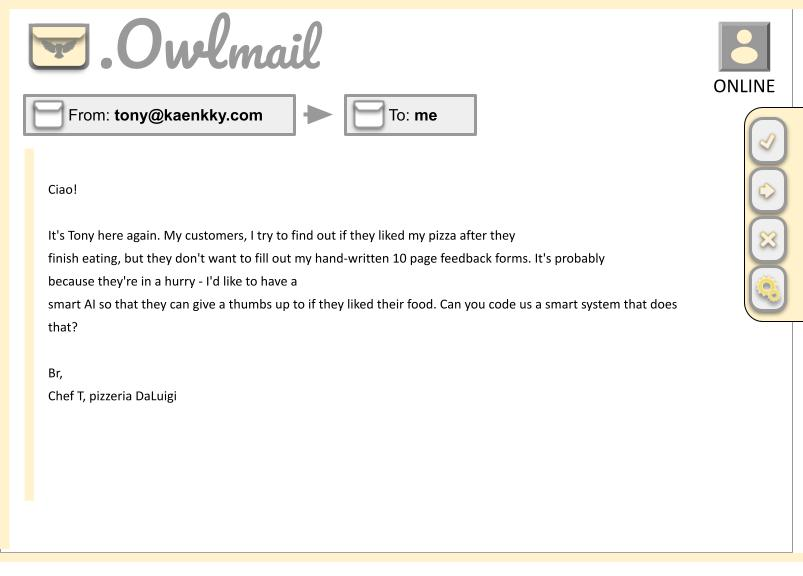
------------------------------------------------------------------------------------------

Ciao!

It's Tony here again. My customers, I try to find out if they liked my pizza after they
finish eating, but they don't want to fill out my hand-written 10 page feedback forms. It's probably
because they're in a hurry - I'd like to have a
smart AI so that they can give a thumbs up to if they liked their food. Can you code us a smart system that does that?

Br,
T, pizzeria DaLuigi

-----------------------------------------------------------------------------------------

# Goals of This Project

Let’s build an AI-powered camera that can detect thumbs-up and thumbs-down gestures! We’ll use a pre-trained AI model from Google to recognize hand gestures.

In previous tasks, we have trained different types of AI models, though our results have varied due to a low amount of training data. For a task like this, there is actually no need to train a new model—we'll just use one that already works! This is often a good idea in professional software development as well, as long as you make sure that the code or model you use is something called *open source* and free to use.

In this project, we will:

1. Download and use a pre-trained AI model for recognizing hand gestures.

2. Capture video from a webcam and process images.

3. Make AI predict the meaning of hand gestures.

4. Improve and customize the AI model's performance.

# Step 1: Importing Dependencies

Before we start detecting gestures, let's import the necessary tools:

In [ ]:
import cv2
import mediapipe as mp
from mediapipe.tasks import python as mp_tasks
from mediapipe.tasks.python import vision
import urllib.request
import os

# Step 2: Step 2: Download the Gesture Recognition Model

You may think that to use AI and machine learning in this task, we would next have to train our model ourself like we did in the previous tasks.
Actually, that's unnecessary! We can use one of Google's free pre-trained gesture recognition models for it. The model comes as a file named *gesture_recognizer.task* If it's missing, running the code below **download the model file automatically.**

In [ ]:

MODEL_URL = "https://storage.googleapis.com/mediapipe-models/gesture_recognizer/gesture_recognizer/float16/1/gesture_recognizer.task"
MODEL_PATH = r"c:\workwork\ritsumeikan\pythontehtavat\gesture_recognizer.task"

try:
    # Check if the model exists; if not, download it
    if not os.path.exists(MODEL_PATH):
        print("Downloading gesture recognizer model...")
        urllib.request.urlretrieve(MODEL_URL, MODEL_PATH)
        print("✅ Download complete!")
    else:
        print("✅ Model already exists, skipping download.")
except Exception as e:
    print(f"❌ Error downloading model: {e}")

✅ Model already exists, skipping download.


**📝 Task 1:** Run the code above and make sure the model downloads correctly. If the download fails, ask for help from your instructor or check your internet connection! ipynb**.

# Step 3: Load the Gesture Recognition Model into our program

Now, let’s load the pre-trained AI model into our program.

In [ ]:
model_path = MODEL_PATH
base_options = mp_tasks.BaseOptions(model_asset_path=model_path)
gesture_recognizer = vision.GestureRecognizer.create_from_options(
    vision.GestureRecognizerOptions(base_options=base_options)
)
print("✅ Gesture Recognition Model Loaded")

✅ Gesture Recognition Model Loaded


**📝 Task 2:** Run the code above. If you see "✅ Gesture Recognition Model Loaded", you’re good to go! If not, double-check that gesture_recognizer.task is in the same folder as your script.

# Step 4: Capture Video from Webcam

We will now use the OpenCV library to capture video from the webcam.

In [ ]:
cap = cv2.VideoCapture(0)  # Open webcam

**📝 Task 3:** Run the code above. If your webcam doesn't turn on, check your permissions or try clicking "Restart" and "Run All" in Visual Studio Code.

# Step 5: Detecting Hand Gestures in Real-Time

Now, let’s use AI to recognize hand gestures from the webcam feed. The code below may look complicated - don't worry about it too much, just try running it.



In [ ]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    image = mp.Image(image_format=mp.ImageFormat.SRGB,
                     data=cv2.cvtColor(cv2.flip(frame, 1), cv2.COLOR_BGR2RGB))

    recognition_result = gesture_recognizer.recognize(image)

    # Get gesture name or default to "No gesture"
    gesture_name = recognition_result.gestures[0][0].category_name if recognition_result.gestures else "No gesture"

    cv2.putText(frame, gesture_name, (50, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow("Gesture Recognition", frame)

    # Close on ESC key or 'X' button
    if cv2.waitKey(1) == 27 or cv2.getWindowProperty("Gesture Recognition", cv2.WND_PROP_VISIBLE) < 1:
        break

cap.release()
cv2.destroyAllWindows()


**Tip:** It's possible that your program crashes at some point. If that happens, press Restart and Run all in the VS code taskbar.

**📝 Task 4:**

* Run the code above. Does it detect your gestures?
* Try showing a thumbs-up and thumbs-down gesture. What does the AI recognize?
* What happens if you move your hand too fast while performing the gesture?


# Step 6: Implementing Tony's request

Right now, the program only detects and displays gestures without tracking them. However, the customer asked us to **record the number of thumbs up given.**

**Make sure Step 5 is not running before continuing! If your webcam is still active, close it and restart the next cell!**



In [ ]:
cap = cv2.VideoCapture(0)
thumbs_up_count = 0  # Counter for thumbs-up gestures

while True:
    ret, frame = cap.read()
    if not ret:
        break

    image = mp.Image(image_format=mp.ImageFormat.SRGB,
                     data=cv2.cvtColor(cv2.flip(frame, 1), cv2.COLOR_BGR2RGB))

    recognition_result = gesture_recognizer.recognize(image)

    # Get detected gesture
    gesture_name = recognition_result.gestures[0][0].category_name if recognition_result.gestures else "No gesture"

    # Increase thumbs-up counter if detected
    if gesture_name == "Thumb_Up":
        thumbs_up_count += 1

    # Display gesture name and thumbs-up count
    cv2.putText(frame, f"Gesture: {gesture_name}", (50, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.putText(frame, f"Thumbs Up Count: {thumbs_up_count}", (50, 100),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2)

    cv2.imshow("Gesture Recognition", frame)

    # Close on ESC key (27) or 'X' button
    if cv2.waitKey(1) == 27 or cv2.getWindowProperty("Gesture Recognition", cv2.WND_PROP_VISIBLE) < 1:
        break

cap.release()
cv2.destroyAllWindows()

**📝 Task 5:**
As you noticed, right now, the thumbs up counter keeps rapidly increasing if you keep doing the gesture. This is because the program is checking whether an user is holding their thumb up on every video frame.
We need to modify the code so it **only counts one thumbs-up per gesture.**

**Hint:** Use a boolean variable thumbs_up_active that prevents counting when the user keeps holding their hand up:

thumbs_up_active = False

if gesture_name == "Thumb_Up" and not thumbs_up_active:
    thumbs_up_count += 1
    thumbs_up_active = True
elif gesture_name != "Thumb_Up":
    thumbs_up_active = False


**📝 Task 6:**
Right now, we're only counting *thumbs up* and not *thumbs down* gestures. Tony wants his customers to be honest; add the thumbs down feature as well!
